## Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

## Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/stellar_h_frac.pkl', 'rb')
stellar_h_data = pickle.load(f)
f.close()

f = open('./Data/gas_h_frac.pkl', 'rb')
gas_h_data = pickle.load(f)
f.close()

f = open('./Data/metal_cut.pkl', 'rb')
metal_cut_data = pickle.load(f)
f.close()

f = open('./Data/Fe_Ox_data.pkl', 'rb')
saved_Fe_Ox_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.in1d(all_halo_numbers, halo_with_BH)
halo_no_BH_ind = np.in1d(all_halo_numbers, halo_with_BH, invert = True)

## Doing some cuts for Stars

In [6]:
stellar_fe_h_all = saved_Fe_Ox_data['Stellar_fe_h']
stellar_mass_all = stellar_metal_data['tot_stellar_mass']


stellar_fe_h = stellar_fe_h_all[halo_no_BH_ind]
BH_stellar_fe_h = stellar_fe_h_all[BH_halo_ind]

stellar_mass = stellar_mass_all[halo_no_BH_ind]

stellar_mass_BH = stellar_metal_BH_data['BH_stellar_mass']

In [7]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [8]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

In [9]:
def between_get_halo_ind(arr1, num1, num2, i):
    x = []
    if num1 < arr1[i] < num2:
        x = np.append(x, i)
    return x

In [10]:
def get_ave(arr1):
    x = []
    x = np.sum(arr1)/len(arr1)
    return x

In [11]:
def mass_bin_error(num1, num2):
    x = (num2 - num1)/2
    return x

### No BH Cuts

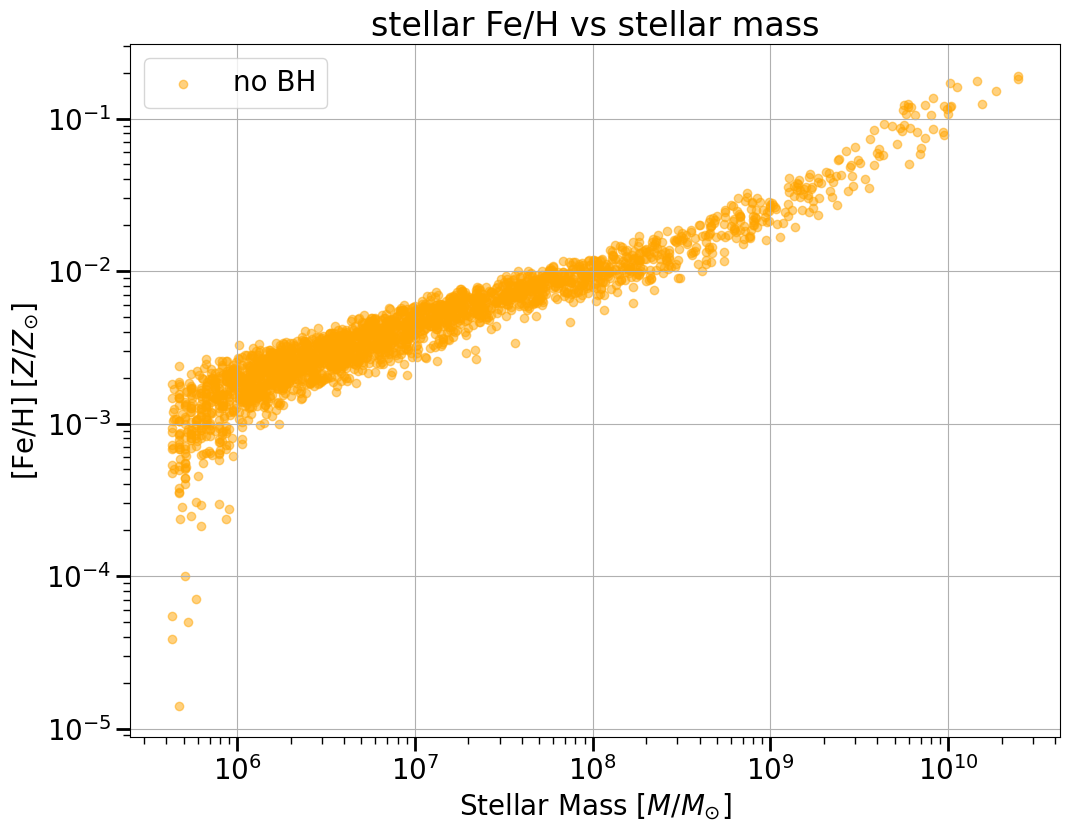

In [12]:
#plt.scatter(stellar_mass_BH, BH_stellar_fe_h/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass, stellar_fe_h/solar_metal, color = 'orange', label = 'no BH', alpha = 0.5)


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-2, 1e-1])


plt.title('stellar Fe/H vs stellar mass')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[Fe/H] $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log Star formation rates/Mstar')

plt.legend()
plt.grid()
plt.show()
#plt.savefig("./Pictures/stellar_fe_h_BH.png", bbox_inches='tight')

In [13]:
loop = np.arange(len(stellar_mass))

no_BH_ind_6 = []
no_BH_ind_7 = []
no_BH_ind_8 = []
no_BH_ind_9 = []
no_BH_ind_10 = []
no_BH_ind_11 = []

for i in loop:
    no_BH_ind_6 = np.append(no_BH_ind_6, small_get_halo_ind(stellar_mass, 1e7, i))
    no_BH_ind_7 = np.append(no_BH_ind_7, between_get_halo_ind(stellar_mass, 1e7, 1e8, i))
    no_BH_ind_8 = np.append(no_BH_ind_8, between_get_halo_ind(stellar_mass, 1e8, 1e9, i))
    no_BH_ind_9 = np.append(no_BH_ind_9, between_get_halo_ind(stellar_mass, 1e9, 1e10, i))
    no_BH_ind_10 = np.append(no_BH_ind_10, between_get_halo_ind(stellar_mass, 1e10, 1e11, i))

In [14]:
no_BH_ind_6 = no_BH_ind_6.astype(int)
no_BH_ind_7 = no_BH_ind_7.astype(int)
no_BH_ind_8 = no_BH_ind_8.astype(int)
no_BH_ind_9 = no_BH_ind_9.astype(int)
no_BH_ind_10 = no_BH_ind_10.astype(int)

In [15]:
no_BH_stellar_fe_ind_6 = (stellar_fe_h[no_BH_ind_6])
no_BH_stellar_fe_ind_7 = stellar_fe_h[no_BH_ind_7]
no_BH_stellar_fe_ind_8 = stellar_fe_h[no_BH_ind_8]
no_BH_stellar_fe_ind_9 = stellar_fe_h[no_BH_ind_9]
no_BH_stellar_fe_ind_10 = stellar_fe_h[no_BH_ind_10]


no_BH_stellar_mass_6 = stellar_mass[no_BH_ind_6]
no_BH_stellar_mass_7 = stellar_mass[no_BH_ind_7]
no_BH_stellar_mass_8 = stellar_mass[no_BH_ind_8]
no_BH_stellar_mass_9 = stellar_mass[no_BH_ind_9]
no_BH_stellar_mass_10 = stellar_mass[no_BH_ind_10]

In [16]:
no_BH_fe_ave_6 = get_ave(no_BH_stellar_fe_ind_6)
no_BH_fe_ave_7 = get_ave(no_BH_stellar_fe_ind_7)
no_BH_fe_ave_8 = get_ave(no_BH_stellar_fe_ind_8)
no_BH_fe_ave_9 = get_ave(no_BH_stellar_fe_ind_9)
no_BH_fe_ave_10 = get_ave(no_BH_stellar_fe_ind_10)

no_BH_mass_ave_6 = get_ave(no_BH_stellar_mass_6)
no_BH_mass_ave_7 = get_ave(no_BH_stellar_mass_7)
no_BH_mass_ave_8 = get_ave(no_BH_stellar_mass_8)
no_BH_mass_ave_9 = get_ave(no_BH_stellar_mass_9)
no_BH_mass_ave_10 = get_ave(no_BH_stellar_mass_10)

In [17]:
no_bh_mass_ave = []
no_bh_mass_ave = np.append(no_bh_mass_ave, no_BH_mass_ave_6)
no_bh_mass_ave = np.append(no_bh_mass_ave, no_BH_mass_ave_7)
no_bh_mass_ave = np.append(no_bh_mass_ave, no_BH_mass_ave_8)
no_bh_mass_ave = np.append(no_bh_mass_ave, no_BH_mass_ave_9)
no_bh_mass_ave = np.append(no_bh_mass_ave, no_BH_mass_ave_10)

In [18]:
no_bh_fe_ave = []
no_bh_fe_ave = np.append(no_bh_fe_ave, no_BH_fe_ave_6)
no_bh_fe_ave = np.append(no_bh_fe_ave, no_BH_fe_ave_7)
no_bh_fe_ave = np.append(no_bh_fe_ave, no_BH_fe_ave_8)
no_bh_fe_ave = np.append(no_bh_fe_ave, no_BH_fe_ave_9)
no_bh_fe_ave = np.append(no_bh_fe_ave, no_BH_fe_ave_10)

In [19]:
no_BH_met_ind_6_std = st.stdev(no_BH_stellar_fe_ind_6)
no_BH_met_ind_7_std = st.stdev(no_BH_stellar_fe_ind_7)
no_BH_met_ind_8_std = st.stdev(no_BH_stellar_fe_ind_8)
no_BH_met_ind_9_std = st.stdev(no_BH_stellar_fe_ind_9)
no_BH_met_ind_10_std = st.stdev(no_BH_stellar_fe_ind_10)

In [20]:
y_error2 = []
y_error2 = np.append(y_error2, no_BH_met_ind_6_std)
y_error2 = np.append(y_error2, no_BH_met_ind_7_std)
y_error2 = np.append(y_error2, no_BH_met_ind_8_std)
y_error2 = np.append(y_error2, no_BH_met_ind_9_std)
y_error2 = np.append(y_error2, no_BH_met_ind_10_std)

### BH Cuts

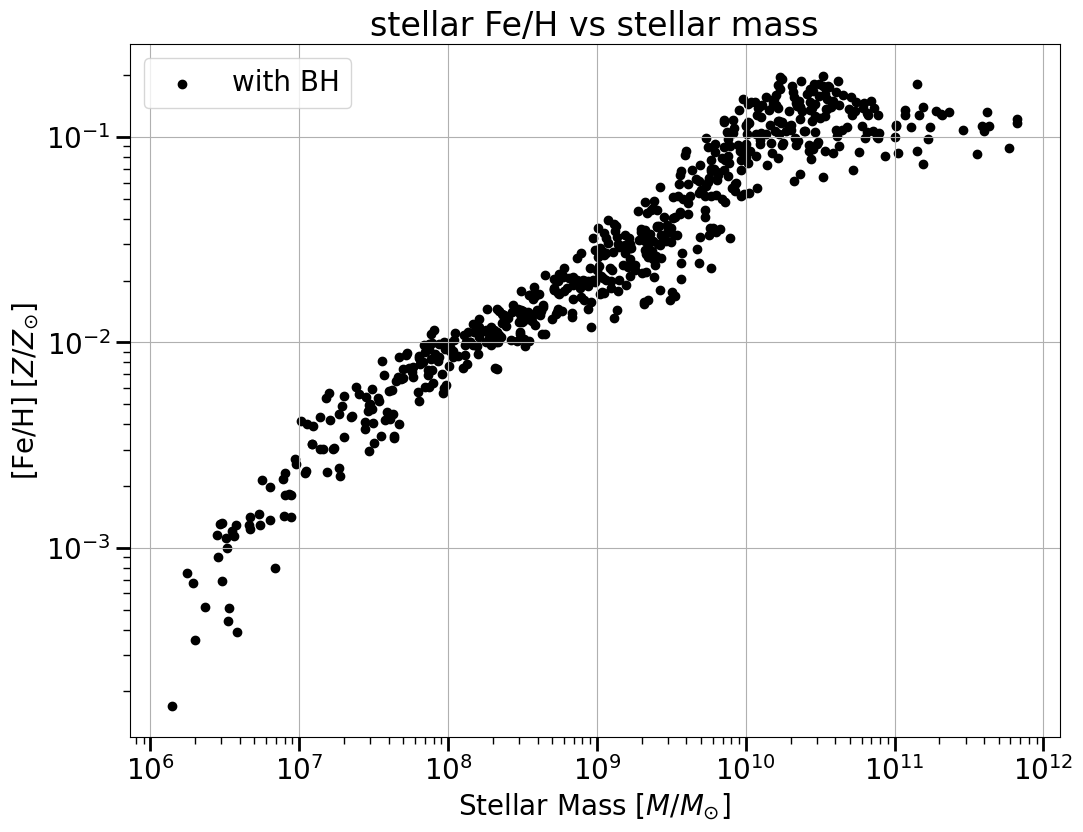

In [21]:
plt.scatter(stellar_mass_BH, BH_stellar_fe_h/solar_metal, color = 'black', label = 'with BH')
#plt.scatter(stellar_mass, stellar_fe_h/solar_metal, color = 'orange', label = 'no BH', alpha = 0.5)


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e6, 1e8])
#plt.ylim([1e-4, 1e-2])


plt.title('stellar Fe/H vs stellar mass')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[Fe/H] $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log Star formation rates/Mstar')

plt.legend()
plt.grid()
plt.show()
#plt.savefig("./Pictures/stellar_fe_h_BH.png", bbox_inches='tight')

In [22]:
loop1 = np.arange(len(stellar_mass_BH))

ind_6 = []
ind_7 = []
ind_8 = []
ind_9 = []
ind_10 = []
ind_11 = []

for i in loop1:
    ind_6 = np.append(ind_6, small_get_halo_ind(stellar_mass_BH, 1e7, i))
    ind_7 = np.append(ind_7, between_get_halo_ind(stellar_mass_BH, 1e7, 1e8, i))
    ind_8 = np.append(ind_8, between_get_halo_ind(stellar_mass_BH, 1e8, 1e9, i))
    ind_9 = np.append(ind_9, between_get_halo_ind(stellar_mass_BH, 1e9, 1e10, i))
    ind_10 = np.append(ind_10, between_get_halo_ind(stellar_mass_BH, 1e10, 1e11, i))
    ind_11 = np.append(ind_11, between_get_halo_ind(stellar_mass_BH, 1e11, 1e12, i))

In [23]:
ind_6 = ind_6.astype(int)
ind_7 = ind_7.astype(int)
ind_8 = ind_8.astype(int)
ind_9 = ind_9.astype(int)
ind_10 = ind_10.astype(int)
ind_11 = ind_11.astype(int)

In [24]:
stellar_fe_ind_6 = BH_stellar_fe_h[ind_6]
stellar_fe_ind_7 = BH_stellar_fe_h[ind_7]
stellar_fe_ind_8 = BH_stellar_fe_h[ind_8]
stellar_fe_ind_9 = BH_stellar_fe_h[ind_9]
stellar_fe_ind_10 = BH_stellar_fe_h[ind_10]
stellar_fe_ind_11 = BH_stellar_fe_h[ind_11]

stellar_mass_BH_ind_6 = stellar_mass_BH[ind_6]
stellar_mass_BH_ind_7 = stellar_mass_BH[ind_7]
stellar_mass_BH_ind_8 = stellar_mass_BH[ind_8]
stellar_mass_BH_ind_9 = stellar_mass_BH[ind_9]
stellar_mass_BH_ind_10 = stellar_mass_BH[ind_10]
stellar_mass_BH_ind_11 = stellar_mass_BH[ind_11]

In [25]:
fe_ave_ind_6 = get_ave(stellar_fe_ind_6)
fe_ave_ind_7 = get_ave(stellar_fe_ind_7)
fe_ave_ind_8 = get_ave(stellar_fe_ind_8)
fe_ave_ind_9 = get_ave(stellar_fe_ind_9)
fe_ave_ind_10 = get_ave(stellar_fe_ind_10)
fe_ave_ind_11 = get_ave(stellar_fe_ind_11)

mass_ave_ind_6 = get_ave(stellar_mass_BH_ind_6)
mass_ave_ind_7 = get_ave(stellar_mass_BH_ind_7)
mass_ave_ind_8 = get_ave(stellar_mass_BH_ind_8)
mass_ave_ind_9 = get_ave(stellar_mass_BH_ind_9)
mass_ave_ind_10 = get_ave(stellar_mass_BH_ind_10)
mass_ave_ind_11 = get_ave(stellar_mass_BH_ind_11)

In [26]:
met_ind_6_std = st.stdev(stellar_fe_ind_6)
met_ind_7_std = st.stdev(stellar_fe_ind_7)
met_ind_8_std = st.stdev(stellar_fe_ind_8)
met_ind_9_std = st.stdev(stellar_fe_ind_9)
met_ind_10_std = st.stdev(stellar_fe_ind_10)
met_ind_11_std = st.stdev(stellar_fe_ind_11)

In [27]:
y_error = []
y_error = np.append(y_error, met_ind_6_std)
y_error = np.append(y_error, met_ind_7_std)
y_error = np.append(y_error, met_ind_8_std)
y_error = np.append(y_error, met_ind_9_std)
y_error = np.append(y_error, met_ind_10_std)
y_error = np.append(y_error, met_ind_11_std)

In [28]:
mass_ave = []
mass_ave = np.append(mass_ave, mass_ave_ind_6)
mass_ave = np.append(mass_ave, mass_ave_ind_7)
mass_ave = np.append(mass_ave, mass_ave_ind_8)
mass_ave = np.append(mass_ave, mass_ave_ind_9)
mass_ave = np.append(mass_ave, mass_ave_ind_10)
mass_ave = np.append(mass_ave, mass_ave_ind_11)

In [29]:
fe_ave = []
fe_ave = np.append(fe_ave, fe_ave_ind_6)
fe_ave = np.append(fe_ave, fe_ave_ind_7)
fe_ave = np.append(fe_ave, fe_ave_ind_8)
fe_ave = np.append(fe_ave, fe_ave_ind_9)
fe_ave = np.append(fe_ave, fe_ave_ind_10)
fe_ave = np.append(fe_ave, fe_ave_ind_11)

## Plot for Stars

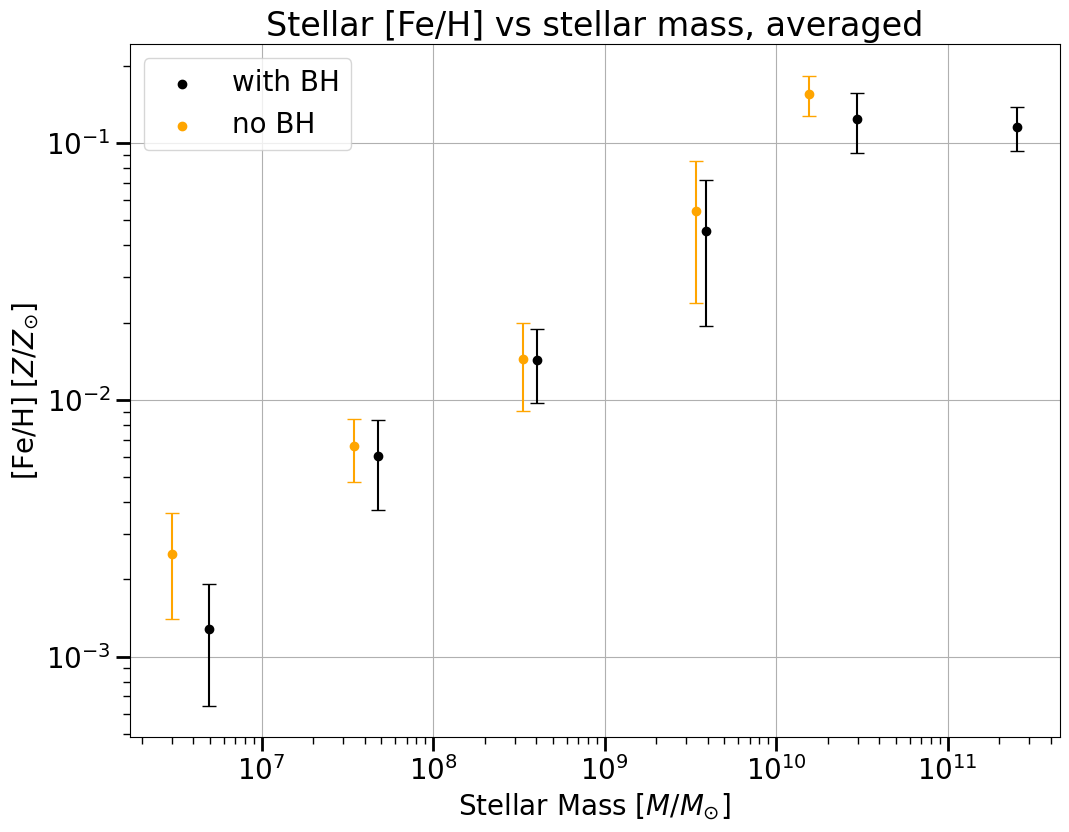

In [32]:
plt.scatter(mass_ave, fe_ave/solar_metal, label = 'with BH', color = 'black')
plt.scatter(no_bh_mass_ave, no_bh_fe_ave/solar_metal, label = 'no BH', color = 'orange')

plt.errorbar(mass_ave, fe_ave/solar_metal, yerr = y_error/solar_metal, fmt = '.', capsize = 5, color = 'black')
plt.errorbar(no_bh_mass_ave, no_bh_fe_ave/solar_metal, yerr = y_error2/solar_metal, fmt = '.', capsize = 5, color = 'orange')

plt.xscale('log')
plt.yscale('log')

plt.title('Stellar [Fe/H] vs stellar mass, averaged')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[Fe/H] $[Z/Z_{\odot}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/stellar_fe_ave.png", bbox_inches='tight')

#### Test Graph

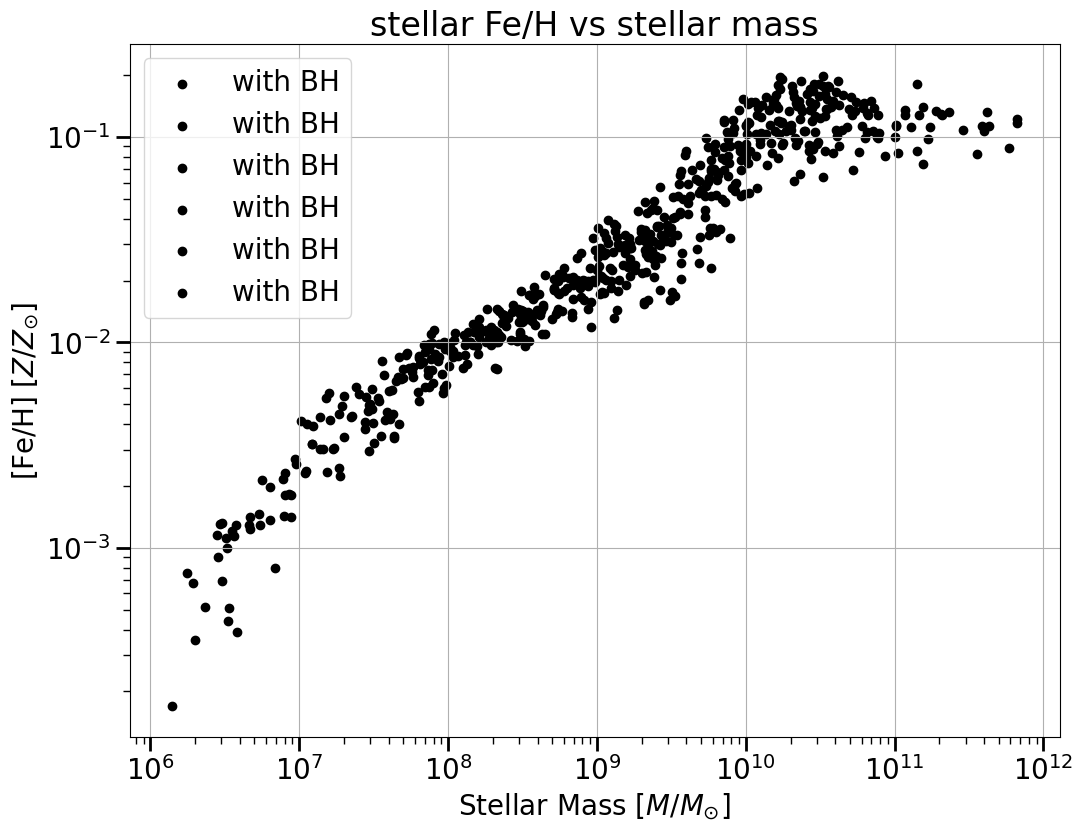

In [31]:
plt.scatter(stellar_mass_BH[ind_6], BH_stellar_fe_h[ind_6]/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass_BH[ind_7], BH_stellar_fe_h[ind_7]/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass_BH[ind_8], BH_stellar_fe_h[ind_8]/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass_BH[ind_9], BH_stellar_fe_h[ind_9]/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass_BH[ind_10], BH_stellar_fe_h[ind_10]/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass_BH[ind_11], BH_stellar_fe_h[ind_11]/solar_metal, color = 'black', label = 'with BH')



plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-2, 1e-1])


plt.title('stellar Fe/H vs stellar mass')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[Fe/H] $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log Star formation rates/Mstar')

plt.legend()
plt.grid()
plt.show()
#plt.savefig("./Pictures/stellar_fe_h_BH.png", bbox_inches='tight')